##### Notino Test Assigment
###### Author: Klara Martinaskova
###### Task: Evaluate an AB test of the recommendation algorithm


In [218]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile
import os
import csv
import scipy.stats as stats


In [219]:
# open CSV files
with open('clients_final.csv', 'r') as file:
    csv_clients = csv.reader(file)
with open('orders_final.csv', 'r') as file:
    csv_orders = csv.reader(file)

In [220]:

print(type(csv_clients))
print(type(csv_orders))

<class '_csv.reader'>
<class '_csv.reader'>


In [221]:
# open csv file ans save as dataframe
df_clients = pd.read_csv('clients_final.csv')
df_orders = pd.read_csv('orders_final.csv')

print(type(df_clients))
print(type(df_orders))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [222]:
print(df_clients.head())

         date country               sessionID            clientID  isNew  \
0  2023-05-17      CH  4917af16af33f.smyluydm  47f9978883.4917aff      0   
1  2023-05-17      CH  4917af16aff17.xgrloruz   913x1x688.497f486      0   
2  2023-05-17      CH   4917af166a373.j1v9mmi  491a661ax6.4917aff      1   
3  2023-05-17      CH   4917af1669x74.vsakfcn  4ff8714149.4917af9      1   
4  2023-05-17      CH   4917af1661f1a.fxp7nsf  67a67x3f9.4917af18      1   

   abUser  orderNumber  
0     1.0          NaN  
1     1.0          NaN  
2     1.0          NaN  
3     1.0          NaN  
4     1.0          NaN  


In [223]:
df_clients = pd.read_csv('clients_final.csv',encoding="cp1250", sep=",", low_memory=False)

In [224]:
print(df_clients.head())

         date country               sessionID            clientID  isNew  \
0  2023-05-17      CH  4917af16af33f.smyluydm  47f9978883.4917aff      0   
1  2023-05-17      CH  4917af16aff17.xgrloruz   913x1x688.497f486      0   
2  2023-05-17      CH   4917af166a373.j1v9mmi  491a661ax6.4917aff      1   
3  2023-05-17      CH   4917af1669x74.vsakfcn  4ff8714149.4917af9      1   
4  2023-05-17      CH   4917af1661f1a.fxp7nsf  67a67x3f9.4917af18      1   

   abUser  orderNumber  
0     1.0          NaN  
1     1.0          NaN  
2     1.0          NaN  
3     1.0          NaN  
4     1.0          NaN  


In [225]:
abUser1 = df_clients[df_clients['abUser']==1.0]
print(abUser1.shape)
print(abUser1['abUser'].count())
print((df_clients['abUser']==1.0))

(2769600, 7)
2769600
0           True
1           True
2           True
3           True
4           True
           ...  
5562167     True
5562168    False
5562169    False
5562170    False
5562171     True
Name: abUser, Length: 5562172, dtype: bool


In [226]:
sum_reco = (df_clients['abUser']==1.0).sum()
sum_control = (df_clients['abUser']==2.0).sum()
sum_99 = (df_clients['abUser']).isna().sum()
# print only unique values in abUser
print(df_clients['abUser'].unique())
print(sum_reco)
print(sum_control)
print(sum_99)
print(sum_reco + sum_control + sum_99)
print(df_clients.shape)

[ 1.  2. nan]
2769600
2770134
22438
5562172
(5562172, 7)


In [227]:
abUser_unique = df_clients['abUser'].unique() # 99 is not present here (just NaN)
txt = "Unique values in abUser: {}"
print(txt.format(abUser_unique))

Unique values in abUser: [ 1.  2. nan]


In [228]:
# o	Is the ratio of users in the reco group and users in the test group really 50:50? 
# reco group: abUser   = 2
# control group: abUser = 1

reco_count = df_clients['abUser'][df_clients['abUser']==1].count()
control_count = df_clients['abUser'][df_clients['abUser']==2].count()
other_count = (df_clients['abUser']).isna().sum()

print(reco_count)
print(control_count)
print(other_count)
print(reco_count + control_count + other_count) # check sum of all
print(df_clients.shape)





2769600
2770134
22438
5562172
(5562172, 7)


In [229]:
# •	What about the users with an unassigned group? Bambino thinks the test is fine if their share is below 0.5%. 
reco_count = df_clients['abUser'][df_clients['abUser']==1].count()
control_count = df_clients['abUser'][df_clients['abUser']==2].count()
other_count = (df_clients['abUser']).isna().sum()

percent = other_count/((reco_count + control_count + other_count))*100


if percent < 0.5:
    print("The test is fine, share is below 0.5%.")
    print("Percent of users with an unassigned group: {:.2f}%".format(percent))
else:
    print("The test is not fine, share is {:.2f}%".format(percent))


The test is fine, share is below 0.5%.
Percent of users with an unassigned group: 0.40%


In [230]:
# group by date
groupt_date = df_clients.groupby('date')
print(groupt_date.head())

               date country               sessionID            clientID  \
0        2023-05-17      CH  4917af16af33f.smyluydm  47f9978883.4917aff   
1        2023-05-17      CH  4917af16aff17.xgrloruz   913x1x688.497f486   
2        2023-05-17      CH   4917af166a373.j1v9mmi  491a661ax6.4917aff   
3        2023-05-17      CH   4917af1669x74.vsakfcn  4ff8714149.4917af9   
4        2023-05-17      CH   4917af1661f1a.fxp7nsf  67a67x3f9.4917af18   
...             ...     ...                     ...                 ...   
4850093  2023-06-14      CH  49199f9a17a17.snx39iox   69a1a9348.49199f9   
4850094  2023-06-14      CH  49199f9a19441.mx3mzhbg  4188a94139.49199fx   
4850095  2023-06-14      CH  49199f96a94xx.1yp1ge6r   a3974a4979.49xf99   
4850096  2023-06-14      CH  49199f96x9371.nrd9r8tv  4319f86691.49198x1   
4850097  2023-06-14      CH   49199f96f1ff9.vkrwehp   x46134166.49199f9   

         isNew  abUser  orderNumber  
0            0     1.0          NaN  
1            0     1.0 

In [231]:
# how many order num is Nan
print(df_clients['orderNumber'].isna().sum())

5289905


In [232]:
# o	Can you test it by an appropriate statistical test? 
# o	Do you prefer to test it on a daily basis, or to run one test for the whole period? 
# o	If you run multiple tests, do you need all of them to have positive results to verify the 50:50 distribution hypothesis? 


In [233]:
print(df_clients.duplicated())

0          False
1          False
2          False
3          False
4          False
           ...  
5562167    False
5562168    False
5562169    False
5562170    False
5562171    False
Length: 5562172, dtype: bool


In [234]:
# new_df = df.dropna() # new dataframe, which doesnot change the original dataframe and does not contain NaN values
# df['Date'] = pd.to_datetime(df['Date']) # convert column Date to datetime
# print(df.duplicated())
# df.drop_duplicates(inplace = True)


In [235]:
# •	What about the orders that are not in GA data? What is their share? How do you propose to handle them?
df_join = df_clients.merge(df_orders, on='orderNumber', how='inner') # inner join
df_join_count = df_join['orderNumber'].count() # number of common orders in both dataframes
df_clients_count = df_clients['orderNumber'].count() # number of orders in df_clients
share = 1-(df_join_count/df_clients_count) # share of orders that are not in GA data

print("Share of orders that are not in GA data: {:.2f}%".format(share*100))

Share of orders that are not in GA data: 8.76%


In [236]:
print(df_join.head())

       date_x country_x               sessionID            clientID  isNew  \
0  2023-05-17        CH   4917af16fx34x.n6c6bdy  4f17a76x4f.4917af9      0   
1  2023-05-17        CH   4917af184a73x.esah47g   74x747x34.49364ax      0   
2  2023-05-17        CH  4917af1887a37.axhmhla9   7xfx73f47.49xf9a1      0   
3  2023-05-17        CH  491764771a143.uf1pn9mb  478786336a.48f641a      0   
4  2023-05-17        CH  4917af6afxxfa.3zn8xizx   7499371f7.4917aa1      0   

   abUser   orderNumber country_y      date_y  quantity   revenue  
0     2.0  1.142808e+09        CH  2023-05-17         1    8.3551  
1     1.0  1.142808e+09        CH  2023-05-17         9  107.4632  
2     1.0  1.142808e+09        CH  2023-05-17         3   14.1620  
3     1.0  1.142810e+09        CH  2023-05-17        26  140.9439  
4     1.0  1.142808e+09        CH  2023-05-17         2   16.4306  


### Analysis of revenue and quantity

#### Firt check of the data

In [237]:
#•	Does the “reco group” earn, on average, a greater revenue? Does it have larger orders? 
# Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?

# reco group =  abUser == 1
# control group = abUser == 2

reco_revenue_mean = df_join['revenue'][df_join['abUser']==1].mean() 
control_revenue_mean = df_join['revenue'][df_join['abUser']==2].mean()

print(reco_revenue_mean)
print(control_revenue_mean)

if reco_revenue_mean > control_revenue_mean:
    print("The reco group earns, on average, a greater revenue.")
else:
    print("The reco group does not earn, on average, a greater revenue.")

print("The average revenue of reco group is {:.2f} and the average revenue of control group is {:.2f}".format(reco_revenue_mean, control_revenue_mean))



66.9124707396017
41.82435776019209
The reco group earns, on average, a greater revenue.
The average revenue of reco group is 66.91 and the average revenue of control group is 41.82


In [238]:
# Does it have larger orders? 
# Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?


In [239]:
reco_quantity_mean = df_join['quantity'][df_join['abUser']==1].mean() 
ceontrol_quantity_mean = df_join['quantity'][df_join['abUser']==2].mean()

print(reco_quantity_mean)
print(ceontrol_quantity_mean)

# almost same, need visualization of distribution

#df_join.loc[df_join[df_join['abUser']==1].quantity]


4.358408478354907
4.350676699239234


#### Plot of distribution of date for quantity and revenue

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


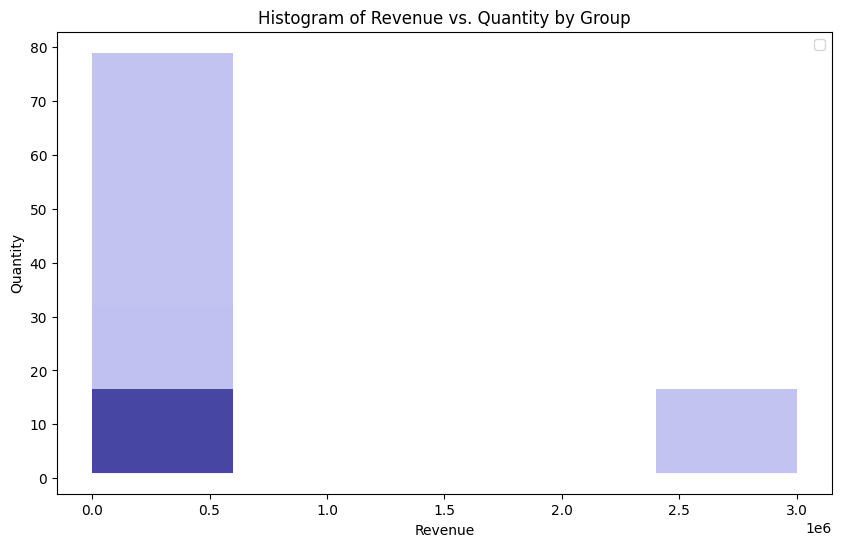

In [240]:
# Filter the DataFrame for group == 1 and group == 2
group_1_data = df_join[df_join['abUser'] == 1]
group_2_data = df_join[df_join['abUser'] == 2]

# Create histograms for each group using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=group_1_data, x='revenue', y='quantity', bins=5, color='blue', label='Group 1')
sns.histplot(data=group_2_data, x='revenue', y='quantity', bins=5, color='red', label='Group 2')

# Customize the plot
plt.xlabel('Revenue')
plt.ylabel('Quantity')
plt.title('Histogram of Revenue vs. Quantity by Group')
plt.legend(loc='upper right')

# Show the plot
plt.show()






<AxesSubplot:ylabel='Frequency'>

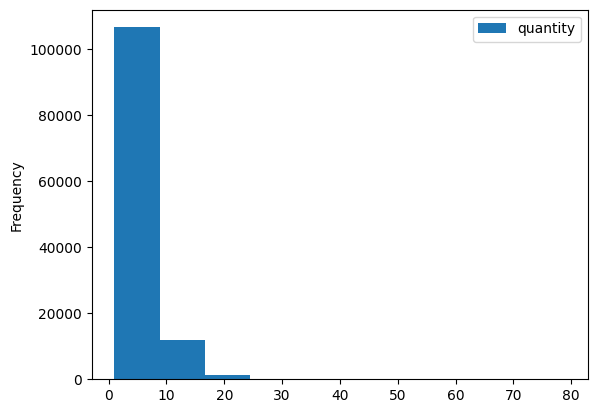

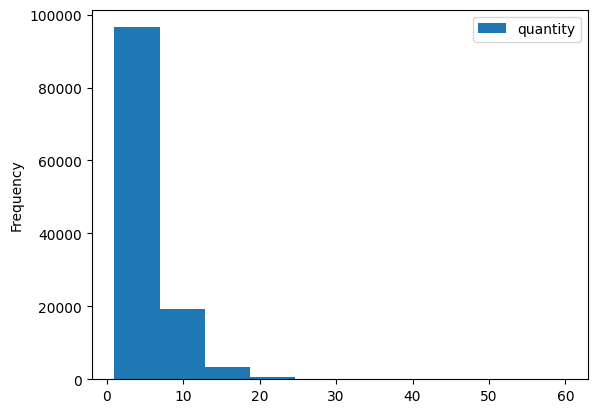

In [241]:
#df.plot(x='game', y=['points_for', 'points_against'])
df_join_reco = df_join[df_join['abUser']==1]
df_join_control = df_join[df_join['abUser']==2]

df_join_reco.plot(x='revenue', y=['quantity'],kind  = "hist")
df_join_control.plot(x='revenue', y=['quantity'], kind = "hist")


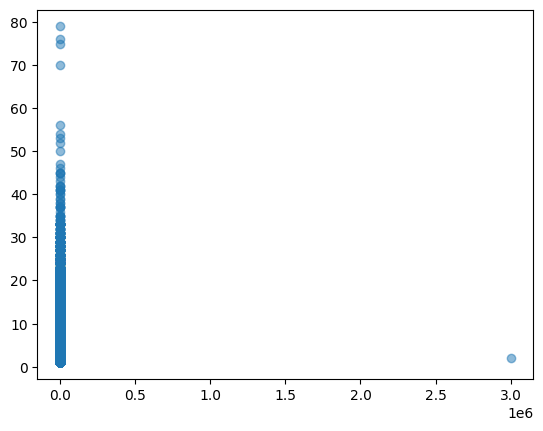

In [242]:
group_1_data = df_join[df_join['abUser'] == 1]

# Create a scatter plot with 'revenue' on the x-axis and 'quantity' on the y-axis
plt.scatter(group_1_data['revenue'], group_1_data['quantity'], alpha=0.5)

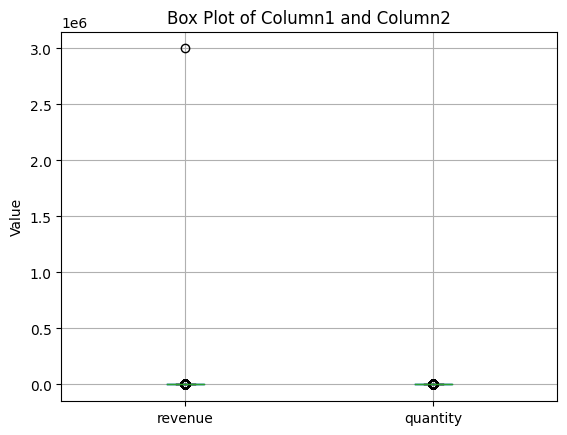

In [243]:
df_join.boxplot(column=["revenue", "quantity"])
plt.ylabel("Value")
plt.title("Box Plot of Column1 and Column2")
plt.show()

(array([2.5049e+04, 3.1337e+04, 2.0186e+04, 1.5132e+04, 9.8250e+03,
        6.2400e+03, 3.8660e+03, 2.4700e+03, 1.6030e+03, 1.1480e+03,
        7.7700e+02, 5.7600e+02, 4.2000e+02, 2.9900e+02, 2.1900e+02,
        1.8800e+02, 1.2700e+02, 1.1400e+02, 8.6000e+01, 7.1000e+01,
        4.9000e+01, 3.7000e+01, 3.7000e+01, 4.0000e+01, 3.0000e+01,
        3.1000e+01, 1.8000e+01, 1.6000e+01, 1.2000e+01, 1.0000e+01,
        1.0000e+01, 1.5000e+01, 7.0000e+00, 1.5000e+01, 6.0000e+00,
        5.0000e+00, 9.0000e+00, 1.3000e+01, 6.0000e+00, 6.0000e+00,
        4.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

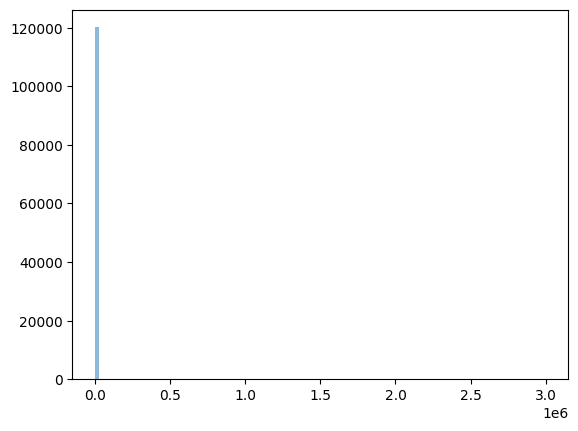

In [244]:
plt.hist(x = df_join['revenue'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['revenue'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')

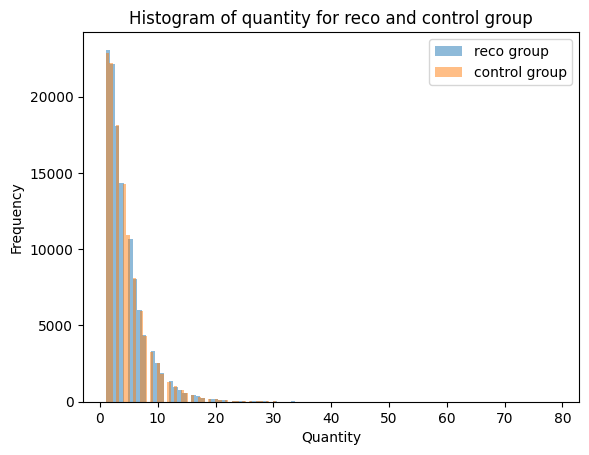

In [245]:
plt.hist(x = df_join['quantity'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['quantity'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend(['reco group', 'control group'])
plt.title('Histogram of quantity for reco and control group')
plt.show()

In [246]:
groubydfjoin = df_join.groupby(["revenue"]).count()

print(len(df_join))
print(len(groubydfjoin))
print(df_join.groupby(["revenue"]).count())


248419
117191
               date_x  country_x  sessionID  clientID  isNew  abUser  \
revenue                                                                
-4.230000e-02       1          1          1         1      1       1   
-2.110000e-02       1          1          1         1      1       1   
-1.000000e-02       1          1          1         1      1       1   
-4.700000e-03       1          1          1         1      1       1   
-4.600000e-03       1          1          1         1      1       1   
...               ...        ...        ...       ...    ...     ...   
 1.251575e+03       1          1          1         1      1       0   
 1.398773e+03       1          1          1         1      1       1   
 1.406341e+03       1          1          1         1      1       1   
 1.527955e+03       1          1          1         1      1       1   
 3.000000e+06       1          1          1         1      1       1   

               orderNumber  country_y  date_y  qu

In [247]:
reco_quantity_mean = df_join['revenue'][df_join['abUser']==1].max() 
ceontrol_quantity_mean = df_join['revenue'][df_join['abUser']==2].max()

print(reco_quantity_mean)
print(ceontrol_quantity_mean)

reco_max = df_join['revenue'][df_join['abUser']==1].idxmax()
control_max = df_join['revenue'][df_join['abUser']==2].idxmax()

print(reco_max)
print(control_max)

print(df_join.iloc[reco_max])


3000000.0
1398.772999
121663
110934
date_x                     2023-06-01
country_x                          NE
sessionID      4918949f91x78.enlkzogr
clientID            4f739637f.4918949
isNew                               1
abUser                            1.0
orderNumber               247862180.0
country_y                          NE
date_y                     2023-06-01
quantity                            2
revenue                     3000000.0
Name: 121663, dtype: object


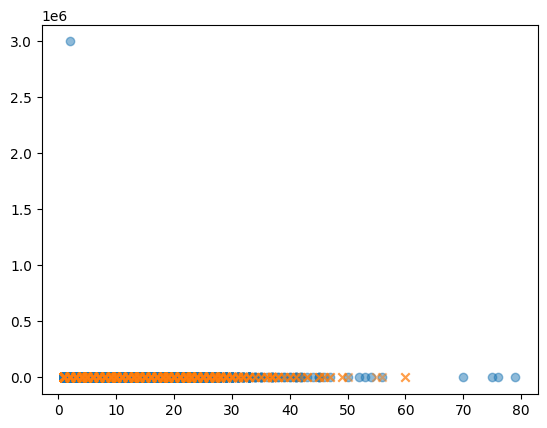

In [248]:
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker = "x")

In [249]:
print(df_join.loc[reco_max])
df_join_without_outliers = df_join.drop(reco_max)

date_x                     2023-06-01
country_x                          NE
sessionID      4918949f91x78.enlkzogr
clientID            4f739637f.4918949
isNew                               1
abUser                            1.0
orderNumber               247862180.0
country_y                          NE
date_y                     2023-06-01
quantity                            2
revenue                     3000000.0
Name: 121663, dtype: object


In [250]:
reco_quantity_mean = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1].mean() 
ceontrol_quantity_mean = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2].mean()

print(reco_quantity_mean)
print(ceontrol_quantity_mean)

4.358428097262314
4.350676699239234


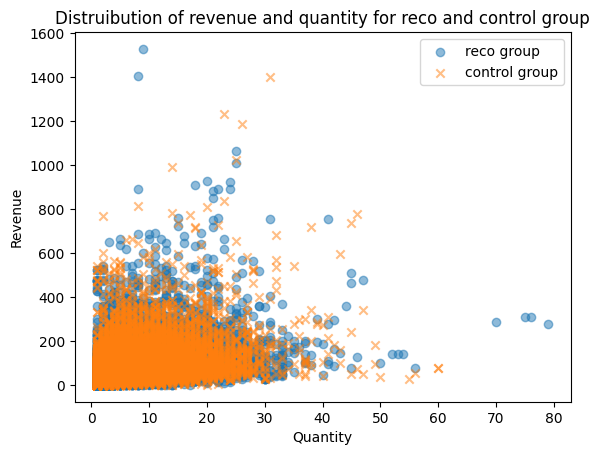

In [251]:
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group')
plt.show()

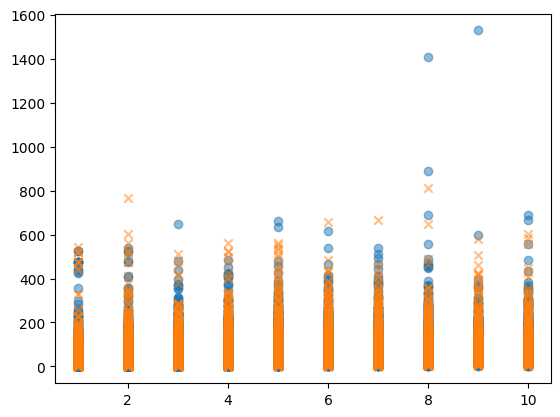

In [252]:
filtered_df = df_join_without_outliers[(df_join_without_outliers['quantity'] >= 1) & (df_join_without_outliers['quantity'] <= 10)]
plt.scatter(filtered_df['quantity'][filtered_df['abUser'] == 1], 
            filtered_df['revenue'][filtered_df['abUser'] == 1], 
            alpha=0.5, marker='o', label='abUser 1')

plt.scatter(filtered_df['quantity'][filtered_df['abUser'] == 2], 
            filtered_df['revenue'][filtered_df['abUser'] == 2], 
            alpha=0.5, marker='x', label='abUser 2')

abUser           1.0         2.0
quantity                        
1          15.066200   15.320000
2          20.847600   20.907750
3          26.289300   26.288800
4          31.026800   30.457050
5          35.468600   35.814550
6          40.596100   39.922700
7          44.806850   44.190900
8          50.081600   48.750000
9          53.516698   53.704200
10         56.436850   54.169600
11         60.987700   61.665700
12         64.778700   62.431450
13         68.249850   71.489900
14         69.078399   71.160000
15         80.717050   78.992100
16         75.833700   79.569050
17         79.468800   80.755598
18         87.958600   84.529498
19         90.800150   98.340000
20         86.981000   95.360000
21         95.280300  105.720700
22        114.706250   97.471197
23        110.047800   93.973600
24         91.202150  108.428247
25        100.751850  108.919350
26        111.756100  123.985699
27        110.554449  138.237200
28         95.020099  152.094799
29        

<Figure size 3000x1000 with 0 Axes>

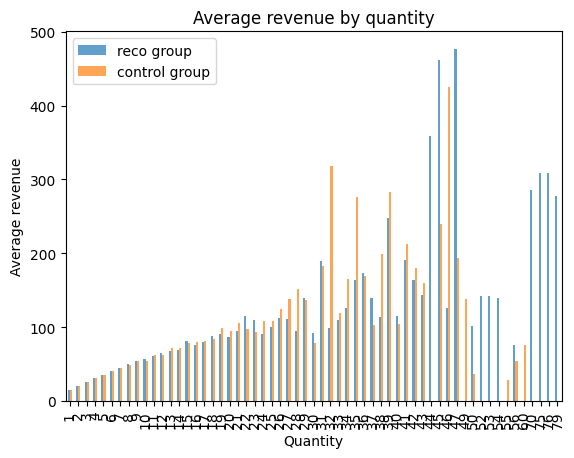

In [253]:

grouped_data = df_join_without_outliers.groupby(['quantity', 'abUser'])['revenue'].median().unstack()
print(grouped_data)

# Create a bar plot
plt.figure(figsize=(30, 10))
ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
ax.legend(['reco group', 'control group'])
plt.show()


<Figure size 1000x600 with 0 Axes>

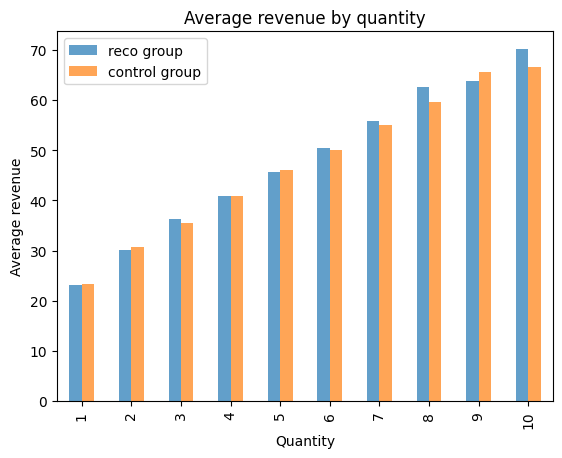

In [254]:
filtered_df = df_join_without_outliers[df_join_without_outliers['quantity'].between(1, 10)]


grouped_data = filtered_df.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
ax.legend(['reco group', 'control group'])

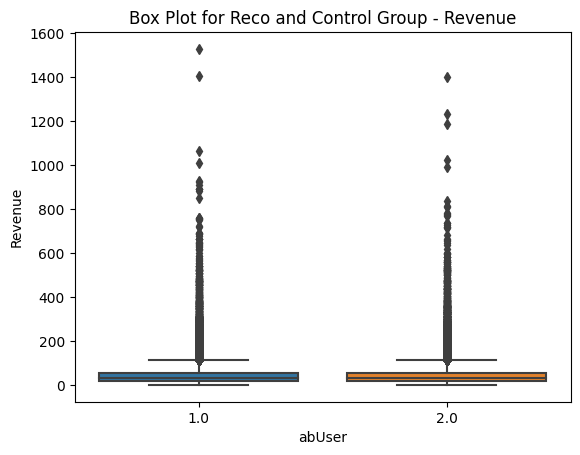

In [255]:
sns.boxplot(data=df_join_without_outliers, x='abUser', y='revenue')
plt.ylabel("Revenue")
plt.title("Box Plot for Reco and Control Group - Revenue")
plt.show()

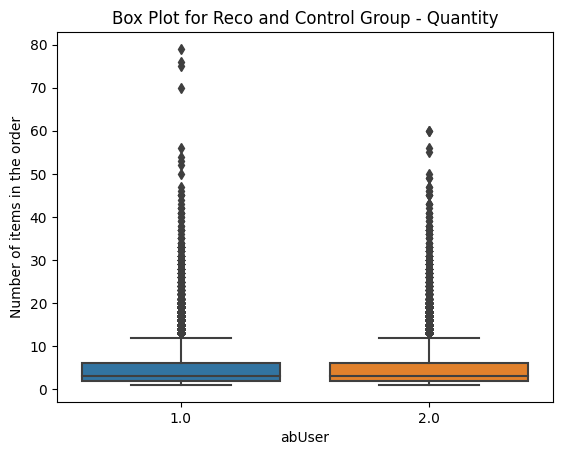

In [256]:
sns.boxplot(data=df_join_without_outliers, x='abUser', y='quantity')
plt.ylabel("Number of items in the order")
plt.title("Box Plot for Reco and Control Group - Quantity")
plt.show()

In [257]:
# visualization for 1-10 orders and their revenue


#### T-test  - first try

In [259]:
import pingouin as pg

In [260]:
# statitic T-test
# https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/
data_group1 = df_join['revenue'][df_join['abUser']==1]
data_group2 = df_join['revenue'][df_join['abUser']==2]

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=1.0049946203368079, pvalue=0.314900452041927)

In [261]:
result = pg.ttest(data_group1,
                  data_group2,
                  correction=True)
print(result)

               T            dof alternative     p-val           CI95%  \
T-test  1.005287  120216.726116   two-sided  0.314761  [-23.83, 74.0]   

        cohen-d   BF10     power  
T-test   0.0041  0.008  0.171309  


In [262]:
data_group1 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1]
data_group2 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2]

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

# Here, since the p-value is greater than alpha = 0.05 so we cannot reject the null hypothesis of the test. 

Ttest_indResult(statistic=0.7665789201028287, pvalue=0.4433326655645149)

In [263]:
# statitic T-test
# https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/

data_group1 = df_join['quantity'][df_join['abUser']==1]
data_group2 = df_join['quantity'][df_join['abUser']==2]

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)


Ttest_indResult(statistic=0.5134949562652239, pvalue=0.6076056100373434)

In [264]:
data_group1 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1]
data_group2 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2]

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=0.5147962137187035, pvalue=0.606695904845074)

In [265]:
result = pg.ttest(data_group1,
                  data_group2,
                  correction=True)
print(result)

               T           dof alternative     p-val          CI95%  cohen-d  \
T-test  0.514797  240336.31949   two-sided  0.606695  [-0.02, 0.04]   0.0021   

         BF10     power  
T-test  0.005  0.080871  


In [266]:
# Test normality
# shapiro-wilk test
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
test_normality_reco_quantity = stats.shapiro(data_reco_without_outliers2)
test_normality_control_quantity = stats.shapiro(data_control_without_outliers2)

print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print(test_normality_reco_quantity)
print(test_normality_control_quantity)

ShapiroResult(statistic=0.6852401494979858, pvalue=0.0)
ShapiroResult(statistic=0.6901998519897461, pvalue=0.0)
ShapiroResult(statistic=0.7836081385612488, pvalue=0.0)
ShapiroResult(statistic=0.78792405128479, pvalue=0.0)


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [267]:
# test homogenity
test_homogenity_revenue = stats.f(data_reco_without_outliers1,data_control_without_outliers1)
test_homogenity_quantity = stats.f(data_reco_without_outliers2,data_control_without_outliers2)


print(test_homogenity_revenue)
print(test_homogenity_quantity)




In [268]:
# test homogenity  leven
res = stats.levene(data_reco_without_outliers1,data_control_without_outliers1, center='trimmed')
print (res.pvalue)

res2 = stats.levene(data_reco_without_outliers2,data_control_without_outliers2, center='trimmed')
print(res2.pvalue)


0.0030542873189224515
0.1087127419323131


In [269]:
# from https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/
# homogeneity test

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value
  
# perform F-test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
control_ftest = f_test(data_reco_without_outliers2,data_control_without_outliers2)
print(reco_ftest)
print(control_ftest)


(1.0162450235366582, 0.002610058156717665)
(1.0169213893294182, 0.0018161378285098673)


#### T-test

In [270]:
# T-test for independent samples unpair
# For data without outliers

# from https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

In [271]:


### For revenue
print("T-test for revenue without outliners: ")
print("")

data_reco_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1]
data_control_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2]

# Shapiro-wilk test - Normality test:
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print("")

# perform F-test - Homogeneity test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
print("F-test - Homogeneity test: ")
print(reco_ftest)
print("")

# Two ways to calculate t-test

result_stats = stats.ttest_ind(a=data_reco_without_outliers1, b=data_control_without_outliers1 , equal_var=True)
print(result_stats)
print("")

result = pg.ttest(data_reco_without_outliers1,
                  data_control_without_outliers1,
                  correction=True)
print(result)
print("---------------------------------")



T-test for revenue without outliners: 

Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.6852401494979858, pvalue=0.0)
ShapiroResult(statistic=0.6901998519897461, pvalue=0.0)

F-test - Homogeneity test: 
(1.0162450235366582, 0.002610058156717665)

Ttest_indResult(statistic=0.7665789201028287, pvalue=0.4433326655645149)

               T            dof alternative     p-val          CI95%  \
T-test  0.766581  240337.542487   two-sided  0.443332  [-0.21, 0.47]   

         cohen-d   BF10     power  
T-test  0.003127  0.006  0.119559  
---------------------------------


In [272]:
### For quantity
print("T-test for quantity without outliners: ")
print("")
data_reco_without_outliers2 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1]
data_control_without_outliers2 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2]

# Shapiro-wilk test - Normality test:
test_normality_reco_quantity = stats.shapiro(data_reco_without_outliers2)
test_normality_control_quantity = stats.shapiro(data_control_without_outliers2)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_quantity)
print(test_normality_control_quantity)
print("")

# perdom F test - Homogeneity test
control_ftest = f_test(data_reco_without_outliers2,data_control_without_outliers2)
print("F-test - Homogeneity test: ")
print(control_ftest)
print("")

# Two ways to calculate t-test
result_stats2 = stats.ttest_ind(a=data_reco_without_outliers2, b=data_control_without_outliers2, equal_var=True)

print(result_stats2)
print("")

result2 = pg.ttest(data_reco_without_outliers2,
                  data_control_without_outliers2,
                  correction=True)
print(result2)

T-test for quantity without outliners: 



Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.7836081385612488, pvalue=0.0)
ShapiroResult(statistic=0.78792405128479, pvalue=0.0)

F-test - Homogeneity test: 
(1.0169213893294182, 0.0018161378285098673)

Ttest_indResult(statistic=0.5147962137187035, pvalue=0.606695904845074)

               T           dof alternative     p-val          CI95%  cohen-d  \
T-test  0.514797  240336.31949   two-sided  0.606695  [-0.02, 0.04]   0.0021   

         BF10     power  
T-test  0.005  0.080871  


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Country analysis

#### try to plot some relation for each country


In [287]:
# group by country
grouped = df_join_without_outliers.groupby('country_y')
print(grouped.head())

          date_x country_x               sessionID            clientID  isNew  \
0     2023-05-17        CH   4917af16fx34x.n6c6bdy  4f17a76x4f.4917af9      0   
1     2023-05-17        CH   4917af184a73x.esah47g   74x747x34.49364ax      0   
2     2023-05-17        CH  4917af1887a37.axhmhla9   7xfx73f47.49xf9a1      0   
3     2023-05-17        CH  491764771a143.uf1pn9mb  478786336a.48f641a      0   
4     2023-05-17        CH  4917af6afxxfa.3zn8xizx   7499371f7.4917aa1      0   
2529  2023-05-17        NE  4917679xa1186.cjpppiti  4483a199af.4917677      1   
2530  2023-05-17        NE   4917679xfxf78.xn3cb3g  4887x71369.4917a48      0   
3368  2023-05-17        NE  491767191x498.sfwnp8xb   41666691ax.49xfa8      0   
3369  2023-05-17        NE  491767f4776f6.momrj9cv  4917971a3f.4917a77      0   
3370  2023-05-17        NE  491767fa67axa.ijoa7imx   4441f13x41.491474      0   

      abUser   orderNumber country_y      date_y  quantity   revenue  
0        2.0  1.142808e+09        CH 

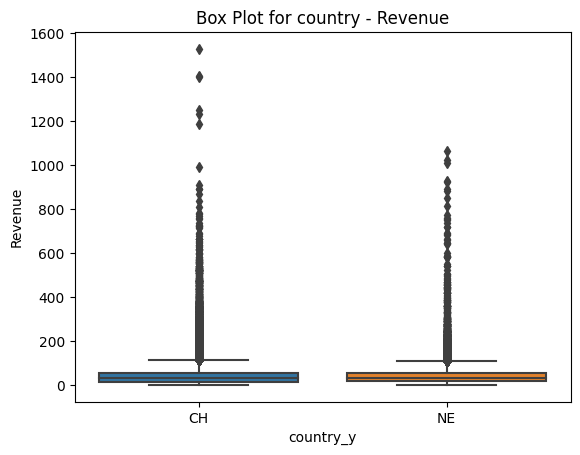

In [289]:
# Boxplot for quantity
sns.boxplot(data=df_join_without_outliers, x='country_y', y='revenue')
plt.ylabel("Revenue")
plt.title("Box Plot for country - Revenue")
plt.show()

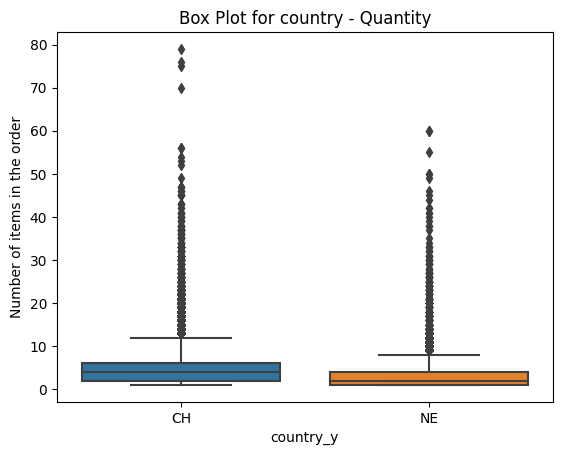

In [290]:
# Boxplot for quantity
sns.boxplot(data=df_join_without_outliers, x='country_y', y='quantity')
plt.ylabel("Number of items in the order")
plt.title("Box Plot for country - Quantity")
plt.show()

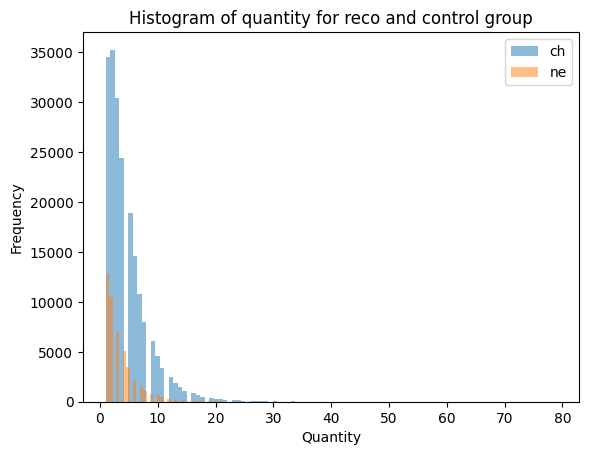

In [298]:
plt.hist(x = df_join_without_outliers['quantity'][df_join['country_y']=="CH"], bins = 100,  alpha = 0.5, label = 'ch')
plt.hist(x = df_join_without_outliers['quantity'][df_join['country_y']=="NE"], bins = 100,  alpha = 0.5, label = 'ne')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of quantity by country')
plt.show()

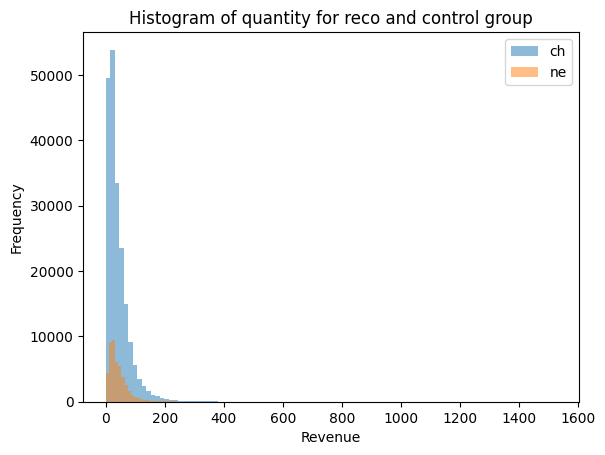

In [304]:
plt.hist(x = df_join_without_outliers['revenue'][df_join['country_y']=="CH"], bins = 100,  alpha = 0.5, label = 'ch')
plt.hist(x = df_join_without_outliers['revenue'][df_join['country_y']=="NE"], bins = 100,  alpha = 0.5, label = 'ne')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of revenue by country')
plt.show()

In [295]:


### For revenue
print("T-test for revenue without outliners: ")
print("")

data_reco_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['country_y']=="CH"]
data_control_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['country_y']=="NE"]

# Shapiro-wilk test - Normality test:
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print("")

# perform F-test - Homogeneity test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
print("F-test - Homogeneity test: ")
print(reco_ftest)
print("")

# Two ways to calculate t-test

result_stats = stats.ttest_ind(a=data_reco_without_outliers1, b=data_control_without_outliers1 , equal_var=True)
print(result_stats)
print("")

result = pg.ttest(data_reco_without_outliers1,
                  data_control_without_outliers1,
                  correction=True)
print(result)
print("---------------------------------")



T-test for revenue without outliners: 

Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.6937749981880188, pvalue=0.0)
ShapiroResult(statistic=0.6472995281219482, pvalue=0.0)

F-test - Homogeneity test: 
(1.0566249262399448, 2.6423307986078726e-14)

Ttest_indResult(statistic=-3.897011626529332, pvalue=9.74124655323286e-05)

               T           dof alternative     p-val           CI95%  \
T-test -3.964757  70842.590728   two-sided  0.000074  [-1.27, -0.43]   

         cohen-d    BF10     power  
T-test  0.020051  15.026  0.973629  
---------------------------------


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


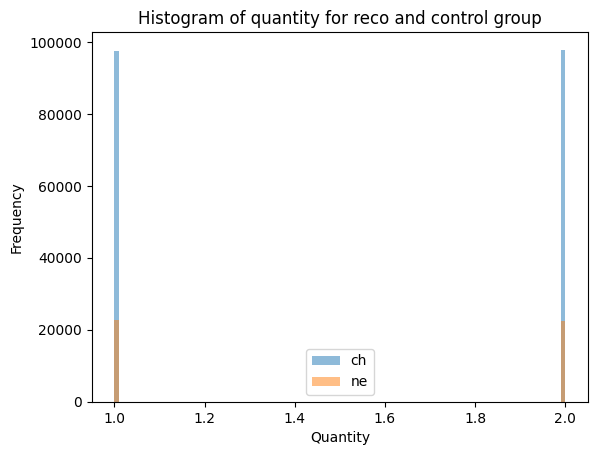

In [300]:
plt.hist(x = df_join_without_outliers['abUser'][df_join['country_y']=="CH"], bins = 100,  alpha = 0.5, label = 'ch')
plt.hist(x = df_join_without_outliers['abUser'][df_join['country_y']=="NE"], bins = 100,  alpha = 0.5, label = 'ne')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of quantity for reco and control group')
plt.show()

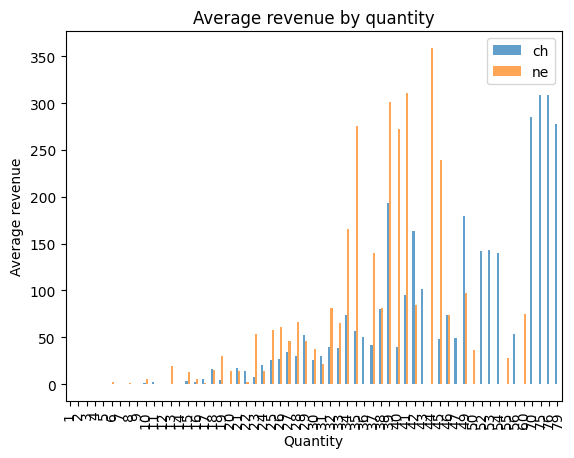

In [303]:
grouped_data = df_join_without_outliers.groupby(['quantity', 'country_y'])['revenue'].min().unstack()

ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
ax.legend(["ch","ne"])
plt.show()


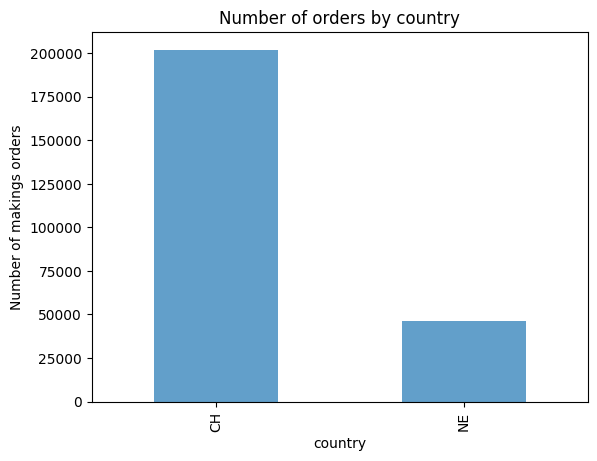

In [309]:
grouped_data_by_country = df_join_without_outliers.groupby(['country_y'])['quantity'].count()

ax = grouped_data_by_country.plot(kind='bar', alpha=0.7)
ax.set_title("Number of orders by country")
ax.set_ylabel('Number of makings orders')
ax.set_xlabel('country')
plt.show()

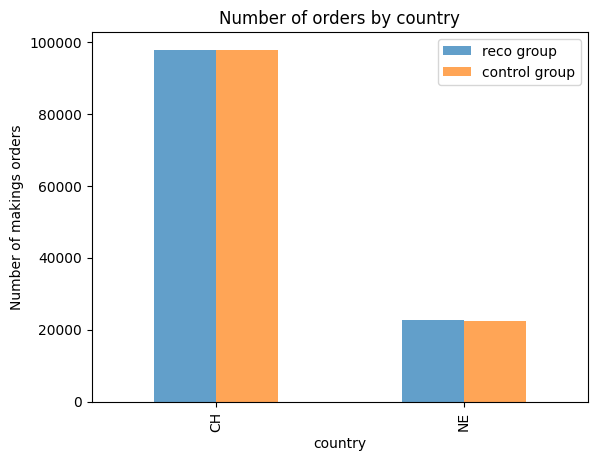

In [314]:
grouped_data_by_country = df_join_without_outliers.groupby(['country_y',"abUser"])['quantity'].count().unstack()

ax = grouped_data_by_country.plot(kind='bar', alpha=0.7)
ax.set_title("Number of orders by country")
ax.set_ylabel('Number of makings orders')
ax.set_xlabel('country')
ax.legend(['reco group', 'control group'])
plt.show()

#### tests for country

In [315]:


### For revenue
print("T-test for revenue without outliners: ")
print("")

data_reco_without_outliers1 = df_join_without_outliers['quantity'][df_join_without_outliers['country_y']=="CH"]
data_control_without_outliers1 = df_join_without_outliers['quantity'][df_join_without_outliers['country_y']=="NE"]

# Shapiro-wilk test - Normality test:
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print("")

# perform F-test - Homogeneity test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
print("F-test - Homogeneity test: ")
print(reco_ftest)
print("")

# Two ways to calculate t-test

result_stats = stats.ttest_ind(a=data_reco_without_outliers1, b=data_control_without_outliers1 , equal_var=True)
print(result_stats)
print("")

result = pg.ttest(data_reco_without_outliers1,
                  data_control_without_outliers1,
                  correction=True)
print(result)
print("---------------------------------")



T-test for revenue without outliners: 

Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.7999206781387329, pvalue=0.0)
ShapiroResult(statistic=0.715840220451355, pvalue=0.0)

F-test - Homogeneity test: 
(1.4562919426726508, 1.1102230246251565e-16)

Ttest_indResult(statistic=59.088964690810535, pvalue=0.0)

                T           dof alternative  p-val         CI95%  cohen-d  \
T-test  66.409641  80736.926481   two-sided    0.0  [1.08, 1.15]  0.30402   

       BF10  power  
T-test  inf    1.0  
---------------------------------


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


In [316]:


### For revenue
print("T-test for revenue without outliners: ")
print("")

data_reco_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['country_y']=="CH"]
data_control_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['country_y']=="NE"]

# Shapiro-wilk test - Normality test:
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print("")

# perform F-test - Homogeneity test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
print("F-test - Homogeneity test: ")
print(reco_ftest)
print("")

# Two ways to calculate t-test

result_stats = stats.ttest_ind(a=data_reco_without_outliers1, b=data_control_without_outliers1 , equal_var=True)
print(result_stats)
print("")

result = pg.ttest(data_reco_without_outliers1,
                  data_control_without_outliers1,
                  correction=True)
print(result)
print("---------------------------------")



T-test for revenue without outliners: 

Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.6937749981880188, pvalue=0.0)
ShapiroResult(statistic=0.6472995281219482, pvalue=0.0)

F-test - Homogeneity test: 
(1.0566249262399448, 2.6423307986078726e-14)

Ttest_indResult(statistic=-3.897011626529332, pvalue=9.74124655323286e-05)

               T           dof alternative     p-val           CI95%  \
T-test -3.964757  70842.590728   two-sided  0.000074  [-1.27, -0.43]   

         cohen-d    BF10     power  
T-test  0.020051  15.026  0.973629  
---------------------------------


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
